# Predicting Housing Prices in Delhi, India Using Neural Networks

House Price Dataset of Delhi, scraped from Magic Bricks between June 2021 and July 2021, containing 18 columns.

In [1]:
!kaggle datasets download -d goelyash/housing-price-dataset-of-delhiindia

Dataset URL: https://www.kaggle.com/datasets/goelyash/housing-price-dataset-of-delhiindia
License(s): CC0-1.0
housing-price-dataset-of-delhiindia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
import zipfile
zip_ref=zipfile.ZipFile("housing-price-dataset-of-delhiindia.zip","r")
zip_ref.extractall()
zip_ref.close()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("Delhi_v2.csv")
df.head()

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7738 non-null   int64  
 1   price             7738 non-null   float64
 2   Address           7738 non-null   object 
 3   area              7738 non-null   float64
 4   latitude          7738 non-null   float64
 5   longitude         7738 non-null   float64
 6   Bedrooms          7738 non-null   float64
 7   Bathrooms         7738 non-null   float64
 8   Balcony           5166 non-null   float64
 9   Status            7164 non-null   object 
 10  neworold          7738 non-null   object 
 11  parking           2612 non-null   float64
 12  Furnished_status  4124 non-null   object 
 13  Lift              1733 non-null   float64
 14  Landmarks         2759 non-null   object 
 15  type_of_building  7738 non-null   object 
 16  desc              7738 non-null   object 


In [7]:
df.describe()

,Unnamed: 0,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft
count,7738.000000,7.738000e+03,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,5166.000000,2612.000000,1733.000000,7738.000000
mean,3868.500000,8.320635e+06,1409.506591,28.552092,77.273476,2.708193,2.501163,2.426442,7.673047,1.829198,5543.660241
std,2233.912524,7.223197e+06,718.929581,0.107420,0.180606,0.877026,0.867050,1.083677,60.417508,1.192607,2408.659307
min,0.000000,1.700000e+06,501.000000,28.240023,76.884101,2.000000,2.000000,1.000000,1.000000,0.000000,2100.000000
25%,1934.250000,4.200000e+06,990.000000,28.455539,77.078590,2.000000,2.000000,2.000000,1.000000,1.000000,3950.986915
50%,3868.500000,6.000000e+06,1250.000000,28.574637,77.345320,3.000000,2.000000,2.000000,1.000000,2.000000,4972.674332
75%,5802.750000,9.500000e+06,1650.000000,28.642520,77.421054,3.000000,3.000000,3.000000,2.000000,2.000000,6350.638693
max,7737.000000,8.500000e+07,9500.000000,28.799748,77.688028,10.000000,10.000000,10.000000,1406.000000,10.000000,44378.698225


In [8]:
df.nunique()

Unnamed: 0          7738
price                584
Address             4145
area                1102
latitude            2942
longitude           2912
Bedrooms               9
Bathrooms              9
Balcony               10
Status                 2
neworold               2
parking               65
Furnished_status       3
Lift                  11
Landmarks           2612
type_of_building       2
desc                4181
Price_sqft          3946
dtype: int64

In [9]:
df.corr(numeric_only=True)

,Unnamed: 0,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft
Unnamed: 0,1.000000,0.022589,0.002100,-0.030258,0.008796,-0.004658,0.008812,0.047535,-0.019743,0.006369,0.036812
price,0.022589,1.000000,0.849073,-0.227517,-0.331883,0.606914,0.691990,0.255096,-0.041640,0.037892,0.682768
area,0.002100,0.849073,1.000000,-0.279069,-0.184427,0.683479,0.763650,0.420476,-0.036780,0.128409,0.292711
latitude,-0.030258,-0.227517,-0.279069,1.000000,0.401701,-0.140817,-0.246663,-0.199374,-0.053874,-0.094808,-0.098981
longitude,0.008796,-0.331883,-0.184427,0.401701,1.000000,-0.166826,-0.205187,0.090932,0.019576,0.139778,-0.451146
Bedrooms,-0.004658,0.606914,0.683479,-0.140817,-0.166826,1.000000,0.765479,0.283880,-0.037920,-0.048828,0.348992
Bathrooms,0.008812,0.691990,0.763650,-0.246663,-0.205187,0.765479,1.000000,0.361291,-0.043036,0.068791,0.356413
Balcony,0.047535,0.255096,0.420476,-0.199374,0.090932,0.283880,0.361291,1.000000,0.000870,0.331883,-0.012863
parking,-0.019743,-0.041640,-0.036780,-0.053874,0.019576,-0.037920,-0.043036,0.000870,1.000000,0.037927,-0.045357
Lift,0.006369,0.037892,0.128409,-0.094808,0.139778,-0.048828,0.068791,0.331883,0.037927,1.000000,-0.133483


In [10]:
dff=df.drop(["Address","Landmarks","price","Unnamed: 0","desc"],axis=1)
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area              7738 non-null   float64
 1   latitude          7738 non-null   float64
 2   longitude         7738 non-null   float64
 3   Bedrooms          7738 non-null   float64
 4   Bathrooms         7738 non-null   float64
 5   Balcony           5166 non-null   float64
 6   Status            7164 non-null   object 
 7   neworold          7738 non-null   object 
 8   parking           2612 non-null   float64
 9   Furnished_status  4124 non-null   object 
 10  Lift              1733 non-null   float64
 11  type_of_building  7738 non-null   object 
 12  Price_sqft        7738 non-null   float64
dtypes: float64(9), object(4)
memory usage: 786.0+ KB


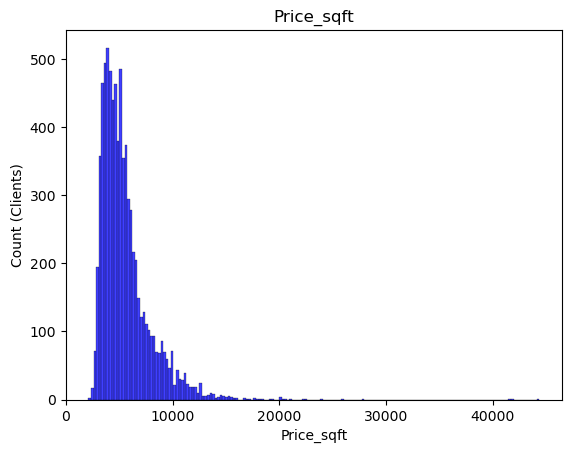

,Price_sqft
count,7738.000000
mean,5543.660241
std,2408.659307
min,2100.000000
25%,3950.986915
50%,4972.674332
75%,6350.638693
max,44378.698225


In [11]:
sns.histplot(data=dff,x="Price_sqft",color="b")
plt.xlabel("Price_sqft")
plt.ylabel("Count (Clients)")
plt.title("Price_sqft")
plt.show()
pd.DataFrame(dff["Price_sqft"].describe())

In [12]:
out=dff["Price_sqft"].quantile(0.95)
out

10000.0

Removing the outliers

In [13]:
datf=dff[dff["Price_sqft"]<=out]
datf.reset_index(inplace=True,drop=True)
datf.shape

(7360, 13)

In [14]:
datf.head()

,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft
0,1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,Flat,4148.148148
1,1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,Flat,5906.040268
2,2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,Flat,6918.238994
3,1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,Flat,3628.571429
4,1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,Flat,4592.592593


Replacing missing values

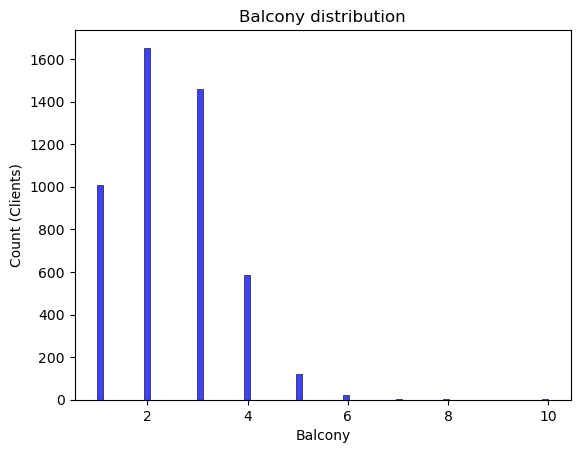

         count
Balcony       
2.0       1653
3.0       1457
1.0       1007
4.0        588
5.0        121
6.0         20
10.0         3
7.0          3
8.0          3
9.0          1


In [15]:
sns.histplot(data=datf,x="Balcony",color="b")
plt.xlabel("Balcony")
plt.ylabel("Count (Clients)")
plt.title("Balcony distribution")
plt.show()
print(pd.DataFrame(datf["Balcony"].value_counts()))

In [16]:
datf["Balcony"].fillna(df["Balcony"].mode().iloc[0],inplace=True)

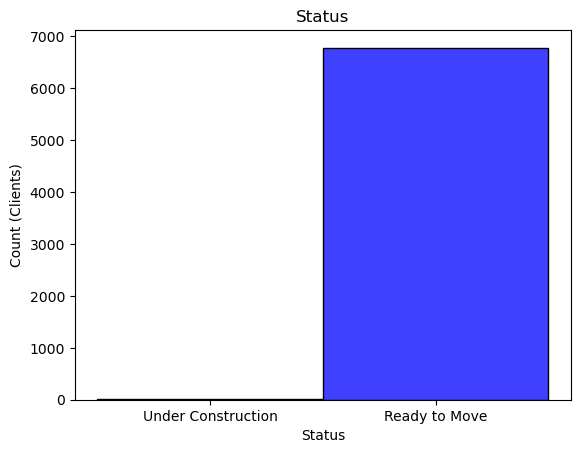

                    count
Status                   
Ready to Move        6782
Under Construction     14


In [17]:
sns.histplot(data=datf,x="Status",color="b")
plt.xlabel("Status")
plt.ylabel("Count (Clients)")
plt.title("Status")
plt.show()
print(pd.DataFrame(datf["Status"].value_counts()))

In [18]:
datf["Status"].fillna(df["Status"].mode().iloc[0],inplace=True)

In [19]:
pd.DataFrame(datf["parking"].value_counts())

,count
parking,
1.0,1651
2.0,574
3.0,84
4.0,29
6.0,10
...,...
18.0,1
602.0,1
16.0,1


In [20]:
datf["parking"].fillna(df["parking"].mode().iloc[0],inplace=True)

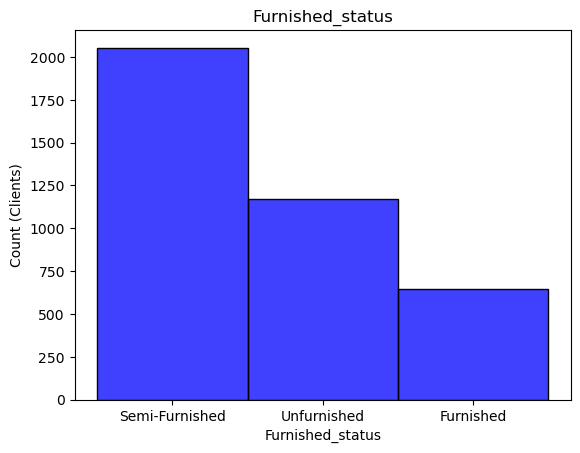

                  count
Furnished_status       
Semi-Furnished     2055
Unfurnished        1172
Furnished           644


In [21]:
sns.histplot(data=datf,x="Furnished_status",color="b")
plt.xlabel("Furnished_status")
plt.ylabel("Count (Clients)")
plt.title("Furnished_status")
plt.show()
print(pd.DataFrame(datf["Furnished_status"].value_counts()))

In [22]:
datf["Furnished_status"].fillna(df["Furnished_status"].mode().iloc[0],inplace=True)

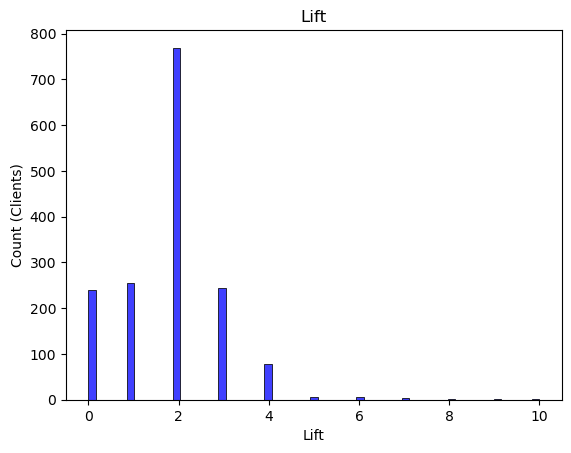

      count
Lift       
2.0     769
1.0     254
3.0     245
0.0     240
4.0      77
6.0       7
5.0       6
7.0       4
10.0      2
8.0       1
9.0       1


In [23]:
sns.histplot(data=datf,x="Lift",color="b")
plt.xlabel("Lift")
plt.ylabel("Count (Clients)")
plt.title("Lift")
plt.show()
print(pd.DataFrame(datf["Lift"].value_counts()))

In [24]:
datf["Lift"].fillna(df["Lift"].mode().iloc[0],inplace=True)

In [25]:
datf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7360 entries, 0 to 7359
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area              7360 non-null   float64
 1   latitude          7360 non-null   float64
 2   longitude         7360 non-null   float64
 3   Bedrooms          7360 non-null   float64
 4   Bathrooms         7360 non-null   float64
 5   Balcony           7360 non-null   float64
 6   Status            7360 non-null   object 
 7   neworold          7360 non-null   object 
 8   parking           7360 non-null   float64
 9   Furnished_status  7360 non-null   object 
 10  Lift              7360 non-null   float64
 11  type_of_building  7360 non-null   object 
 12  Price_sqft        7360 non-null   float64
dtypes: float64(9), object(4)
memory usage: 747.6+ KB


In [26]:
datf.nunique()

area                1057
latitude            2719
longitude           2694
Bedrooms               9
Bathrooms              9
Balcony               10
Status                 2
neworold               2
parking               63
Furnished_status       3
Lift                  11
type_of_building       2
Price_sqft          3715
dtype: int64

Converting the categorical entries into numerical ones

In [27]:
from sklearn.preprocessing import LabelEncoder
final_df=datf
for column in final_df.columns:
    if final_df[column].dtype == 'object': 
        le = LabelEncoder()
        final_df[column] = le.fit_transform(final_df[column])

In [28]:
final_df.corr(numeric_only=True)

,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft
area,1.000000,-0.276648,-0.171144,0.708508,0.773638,0.361521,0.024622,-0.067268,-0.013302,-0.014781,0.043350,0.017414,0.322863
latitude,-0.276648,1.000000,0.422607,-0.144976,-0.248055,-0.151663,-0.005987,0.057831,-0.036681,-0.044814,-0.023581,-0.008844,-0.200779
longitude,-0.171144,0.422607,1.000000,-0.156850,-0.194897,0.059638,0.004647,0.097625,0.003697,-0.008245,0.077498,-0.005782,-0.543093
Bedrooms,0.708508,-0.144976,-0.156850,1.000000,0.753432,0.237567,0.005778,-0.042055,-0.016233,0.008842,-0.026126,0.010986,0.313647
Bathrooms,0.773638,-0.248055,-0.194897,0.753432,1.000000,0.303258,0.024483,-0.052069,-0.018758,-0.010331,0.016043,0.010026,0.330614
Balcony,0.361521,-0.151663,0.059638,0.237567,0.303258,1.000000,-0.013977,-0.035568,0.011083,0.001216,0.148764,-0.002599,0.028140
Status,0.024622,-0.005987,0.004647,0.005778,0.024483,-0.013977,1.000000,-0.127069,-0.002824,-0.006372,0.008236,-0.005648,0.008838
neworold,-0.067268,0.057831,0.097625,-0.042055,-0.052069,-0.035568,-0.127069,1.000000,0.016201,-0.004731,0.013361,-0.006983,-0.074156
parking,-0.013302,-0.036681,0.003697,-0.016233,-0.018758,0.011083,-0.002824,0.016201,1.000000,-0.007023,0.025280,0.022445,-0.018500
Furnished_status,-0.014781,-0.044814,-0.008245,0.008842,-0.010331,0.001216,-0.006372,-0.004731,-0.007023,1.000000,0.043218,-0.007999,-0.052717


In [29]:
final_df.head()

,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft
0,1350.0,28.608850,77.460560,3.0,3.0,2.0,1,0,1.0,1,2.0,0,4148.148148
1,1490.0,28.374236,76.952416,3.0,3.0,2.0,0,0,1.0,1,2.0,0,5906.040268
2,2385.0,28.645769,77.385110,4.0,5.0,2.0,0,0,1.0,2,2.0,0,6918.238994
3,1050.0,28.566914,77.436434,2.0,2.0,3.0,0,0,1.0,2,2.0,0,3628.571429
4,1350.0,28.520732,77.356491,2.0,2.0,3.0,0,1,1.0,1,3.0,0,4592.592593


In [30]:
final_df.drop(["Status"],axis=1,inplace=True)

In [31]:
final_df.shape

(7360, 12)

In [32]:
x=final_df.drop("Price_sqft",axis=1)
y=final_df["Price_sqft"]
x=np.array(x)
y=np.array(y)

In [33]:
x_col=x.shape[1]
x_col

11

Splitting the whole dataset into train and test datasets

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Scaling the features

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [36]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,BatchNormalization, Dropout
import keras_tuner as kt

Hyperparameter Tuning using RandomSearchCV 

In [37]:
def build_model(hp):
    model=Sequential()
    model.add(keras.Input(shape=(x_col,)))
    for i in range(hp.Int("layers",min_value=1,max_value=10)):
        model.add(
            Dense(
                hp.Int("unit"+str(i),min_value=5,max_value=300,step=60),
                activation=hp.Choice("activation"+str(i),values=["relu","tanh"])
                )
            )
    model.add(Dense(1,activation="linear"))
    model.compile(optimizer=tf.keras.optimizers.Adam(
                  hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss="mse",metrics=["mae"])
    
    return model

In [38]:
tuner=kt.RandomSearch(build_model,
                     objective="mae",
                     max_trials=20,
                     directory='my_dir',
                     project_name='hp')

Reloading Tuner from my_dir\hp\tuner0.json


In [39]:
tuner.search(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Trial 20 Complete [00h 00m 09s]
mae: 2395.01318359375

Best mae So Far: 775.0404052734375
Total elapsed time: 00h 03m 51s


In [40]:
tuner.get_best_hyperparameters()[0].values

{'layers': 5,
 'unit0': 245,
 'activation0': 'relu',
 'learning_rate': 0.0002662432681570655,
 'unit1': 5,
 'activation1': 'tanh',
 'unit2': 5,
 'activation2': 'relu',
 'unit3': 245,
 'activation3': 'relu',
 'unit4': 245,
 'activation4': 'relu',
 'unit5': 185,
 'activation5': 'relu',
 'unit6': 125,
 'activation6': 'relu',
 'unit7': 185,
 'activation7': 'tanh',
 'unit8': 125,
 'activation8': 'tanh',
 'unit9': 5,
 'activation9': 'tanh'}

In [41]:
model=tuner.get_best_models(num_models=1)[0]
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 245)               2940      
                                                                 
 dense_1 (Dense)             (None, 5)                 1230      
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dense_3 (Dense)             (None, 245)               1470      
                                                                 
 dense_4 (Dense)             (None, 245)               60270     
                                                                 
 dense_5 (Dense)             (None, 1)                 246       
                                                                 
Total params: 66186 (258.54 KB)
Trainable params: 66186

Using callbacks to prevent overfitting

In [42]:
callback=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
)

In [43]:
history=model.fit(x_train,y_train,epochs=200,validation_data=(x_test,y_test),callbacks=callback)

Epoch 1/200
184/184 [==============================] - 1s 3ms/step - loss: 1050349.7500 - mae: 771.1406 - val_loss: 1134551.2500 - val_mae: 805.5239
Epoch 2/200
184/184 [==============================] - 0s 2ms/step - loss: 1041084.1875 - mae: 766.4742 - val_loss: 1124809.7500 - val_mae: 806.0350
Epoch 3/200
184/184 [==============================] - 0s 2ms/step - loss: 1030343.5625 - mae: 762.7241 - val_loss: 1116075.7500 - val_mae: 801.4805
Epoch 4/200
184/184 [==============================] - 0s 2ms/step - loss: 1021626.1875 - mae: 759.6195 - val_loss: 1137453.5000 - val_mae: 801.6863
Epoch 5/200
184/184 [==============================] - 0s 2ms/step - loss: 1015045.3750 - mae: 755.0263 - val_loss: 1109939.8750 - val_mae: 798.3193
Epoch 6/200
184/184 [==============================] - 0s 2ms/step - loss: 1008032.6250 - mae: 752.6318 - val_loss: 1099815.5000 - val_mae: 793.0822
Epoch 7/200
184/184 [==============================] - 0s 2ms/step - loss: 997602.4375 - mae: 749.6944 - v

Model evaluation

In [44]:
from sklearn.metrics import mean_absolute_error,r2_score,accuracy_score

# Compute MAE
y_pred=model.predict(x_test)
mae = mean_absolute_error(y_test,y_pred )
r2=r2_score(y_test,y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"r2 score: {r2}")

46/46 [==============================] - 0s 1ms/step
Mean Absolute Error (MAE): 753.916823335624
r2 score: 0.6421548497867977


Plotting relative differences in output 

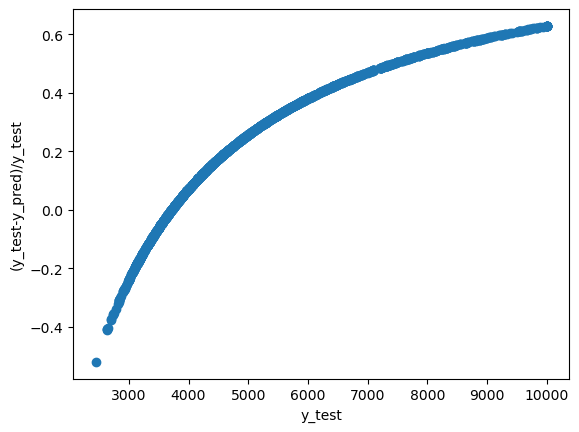

In [45]:
res=y_test-y_pred[0]
plt.scatter(y_test,res/y_test)
plt.xlabel("y_test")
plt.ylabel("(y_test-y_pred)/y_test")
plt.show()

Comparison the performance between train and validation datasets

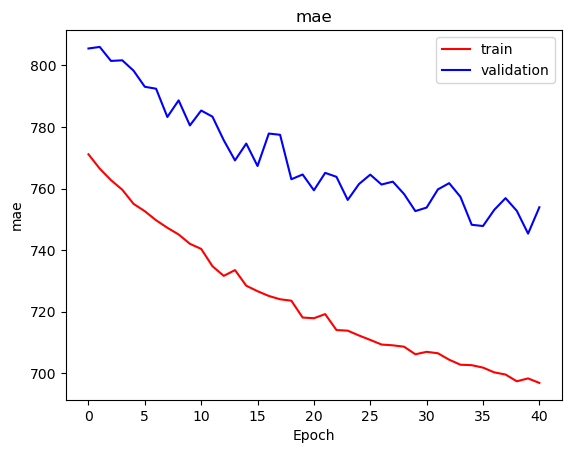

In [46]:
plt.plot(history.history["mae"],color="red",label="train")
plt.plot(history.history["val_mae"],color="blue",label="validation")
plt.title('mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.legend()
plt.show()